# Importing Libraries

In [2]:
# Set up environment with libraries & data

##############################################################################
# Import libraries

import pandas as pd                     # data sceince essentials
import matplotlib.pyplot as plt         # essential graphical output
import seaborn as sns                   # enhanced visualizations
import numpy as np                      # mathematical essentials
from tqdm.notebook import tqdm          # progress bars
import time                             # time essentials
import itertools

t0 = time.time()                        # start time of notebook


from sklearn.feature_selection import SelectFromModel   # feature selection
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.linear_model import LogisticRegression     # logistic regression

import statsmodels.formula.api as smf                   # logistic regression

from sklearn import metrics                             # metrics
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.metrics import classification_report       # classification report
from sklearn.metrics import make_scorer                 # customizable scorer



from sklearn.cluster import KMeans                      # KMeans for segmentation

from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.preprocessing import MinMaxScaler          # minmax scaler
from sklearn.preprocessing import RobustScaler          # robust scaler

from sklearn.neighbors import KNeighborsClassifier      # KNN for classification

from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import export_graphviz                # exports graphics

from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

from six import StringIO                                # saves objects in memory
from IPython.display import Image                       # displays on frontend
import pydotplus                                        # interprets dot objects

from imblearn.over_sampling import SMOTE                # oversampling


#############################################################################
# Import data

# Specify file name
Alimosho = pd.read_csv('AlimoshoLGA_Cleaned.csv')

In [3]:
#calling the top rows in the loaded data set
Alimosho.head()

,TDLinx,Picture,LGA Name,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,PH - Non Alcoholic Beverages,Beverage Trade Profile,Beverage Retail Index,Beverage Retail%
0,L3005043,True,Alimosho,05 - Small Grocery,6.648058,3.252250,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,Very Little [1 To 10%]
1,L3005044,True,Alimosho,24 - Wine & Drink Store,6.647841,3.252777,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,Very Little [1 To 10%]
2,L3005045,True,Alimosho,20 - Basic Bar,6.647844,3.252944,Medium Class C,10,"<10,000",True,Retail Only,1.0,Very Little [1 To 10%]
3,L3005047,True,Alimosho,05 - Small Grocery,6.647805,3.253235,Medium Class C,10,"<10,000",False,NaN,NaN,NaN
4,L3005048,True,Alimosho,20 - Basic Bar,6.647641,3.253381,Medium Class C,12,"<10,000",True,Retail Only,1.0,Very Little [1 To 10%]


In [4]:
#declaring the shape of the data
Alimosho.shape

(33945, 13)

In [5]:
#determining the dtypes of the variables
Alimosho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33945 entries, 0 to 33944
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TDLinx                        33945 non-null  object 
 1   Picture                       33945 non-null  bool   
 2   LGA Name                      33945 non-null  object 
 3   RES Outlet Type               33945 non-null  object 
 4   Latitude                      33945 non-null  float64
 5   Longitude                     33945 non-null  float64
 6   Neighbourhood Income Profile  33945 non-null  object 
 7   Store Selling Area (M2)       33945 non-null  int64  
 8   Monthly Store Turnover        33303 non-null  object 
 9   PH - Non Alcoholic Beverages  33945 non-null  bool   
 10  Beverage Trade Profile        28054 non-null  object 
 11  Beverage Retail Index         28054 non-null  float64
 12  Beverage Retail%              28054 non-null  object 
dtypes

In [6]:
#determining the NaNs in the data
Alimosho.isna().sum()

TDLinx                             0
Picture                            0
LGA Name                           0
RES Outlet Type                    0
Latitude                           0
Longitude                          0
Neighbourhood Income Profile       0
Store Selling Area (M2)            0
Monthly Store Turnover           642
PH - Non Alcoholic Beverages       0
Beverage Trade Profile          5891
Beverage Retail Index           5891
Beverage Retail%                5891
dtype: int64

In [7]:
#descriptive analytics in the data for categorical variables
Alimosho.describe(include = object)

,TDLinx,LGA Name,RES Outlet Type,Neighbourhood Income Profile,Monthly Store Turnover,Beverage Trade Profile,Beverage Retail%
count,33945,33945,33945,33945,33303,28054,28054
unique,33945,1,11,3,15,3,5
top,L3005043,Alimosho,05 - Small Grocery,Medium Class C,"10,000-30,000",Retail Only,Very High [91 To 100%]
freq,1,33945,9699,26875,10234,23044,23024


In [8]:
#descriptive analytics in the data for numerical variables
Alimosho.describe()

,Latitude,Longitude,Store Selling Area (M2),Beverage Retail Index
count,33945.000000,33945.000000,33945.000000,28054.000000
mean,6.599136,3.259876,10.544233,4.441613
std,0.049460,0.024808,9.397439,1.268247
min,6.441332,3.069467,1.000000,1.000000
25%,6.554498,3.245606,8.000000,5.000000
50%,6.599295,3.261686,10.000000,5.000000
75%,6.641933,3.277094,12.000000,5.000000
max,7.118545,3.621053,400.000000,5.000000


In [9]:
#cleaning the columns
#columns rename
Alimosho.rename(columns={"PH - Non Alcoholic Beverages": "_sellLRB"})

,TDLinx,Picture,LGA Name,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Beverage Retail%
0,L3005043,True,Alimosho,05 - Small Grocery,6.648058,3.252250,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,Very Little [1 To 10%]
1,L3005044,True,Alimosho,24 - Wine & Drink Store,6.647841,3.252777,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,Very Little [1 To 10%]
2,L3005045,True,Alimosho,20 - Basic Bar,6.647844,3.252944,Medium Class C,10,"<10,000",True,Retail Only,1.0,Very Little [1 To 10%]
3,L3005047,True,Alimosho,05 - Small Grocery,6.647805,3.253235,Medium Class C,10,"<10,000",False,NaN,NaN,NaN
4,L3005048,True,Alimosho,20 - Basic Bar,6.647641,3.253381,Medium Class C,12,"<10,000",True,Retail Only,1.0,Very Little [1 To 10%]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33940,L3137047,False,Alimosho,12 - Kiosk,6.577168,3.269568,Medium Class C,9,"10,000-30,000",True,Retail Only,5.0,Very High [91 To 100%]
33941,L3137101,False,Alimosho,12 - Kiosk,6.610180,3.263493,Medium Class C,10,"10,000-30,000",True,Retail Only,5.0,Very High [91 To 100%]
33942,L3137102,False,Alimosho,12 - Kiosk,6.610153,3.263483,Medium Class C,10,"10,000-30,000",True,Retail Only,5.0,Very High [91 To 100%]
33943,L3137103,False,Alimosho,12 - Kiosk,6.610152,3.263481,Medium Class C,10,"10,000-30,000",True,Retail Only,5.0,Very High [91 To 100%]


In [10]:
#making bins in the data using beverage retail index
## Beverage retail index is encoded variable for the Beverage Retail %
Alimosho['Bin'] = pd.cut(Alimosho['Beverage Retail Index'], bins = 5)
Alimosho.groupby('Bin')['Beverage Retail Index'].size()

Bin
(0.996, 1.8]     2485
(1.8, 2.6]       1012
(2.6, 3.4]       1156
(3.4, 4.2]        377
(4.2, 5.0]      23024
Name: Beverage Retail Index, dtype: int64

In [11]:
#making bins in the data using store selling area
Alimosho['Bin'] = pd.cut(Alimosho['Store Selling Area (M2)'], bins = 5)
Alimosho.groupby('Bin')['Store Selling Area (M2)'].size()

Bin
(0.601, 80.8]     33906
(80.8, 160.6]        14
(160.6, 240.4]        4
(240.4, 320.2]       14
(320.2, 400.0]        7
Name: Store Selling Area (M2), dtype: int64

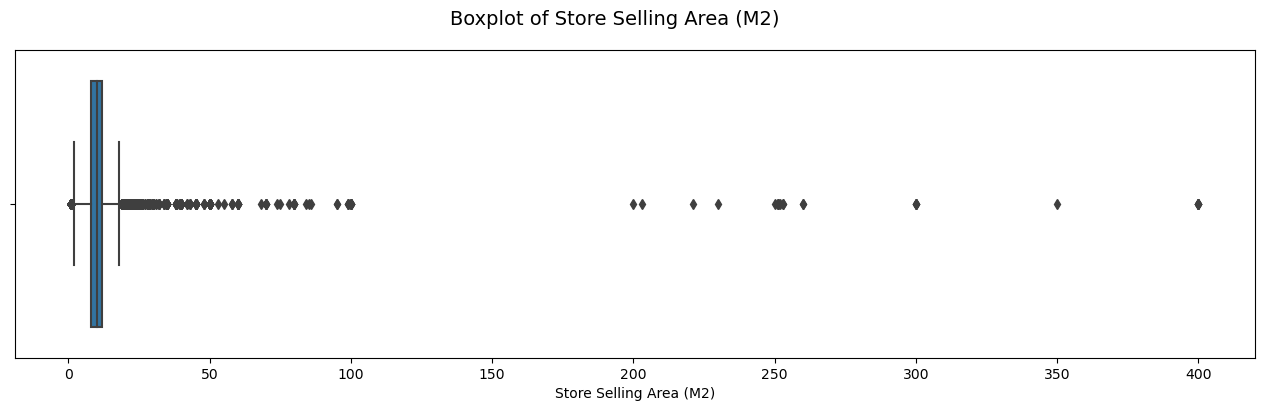

Descriptive Statistics: 

count    33945.000000
mean        10.544233
std          9.397439
min          1.000000
25%          8.000000
50%         10.000000
75%         12.000000
max        400.000000
Name: Store Selling Area (M2), dtype: float64

Counts: 

1       441
2       365
3       464
4       700
5      1299
       ... 
253       2
260       2
300       4
350       1
400       6
Name: Store Selling Area (M2), Length: 70, dtype: int64
---------------------------------------------------------



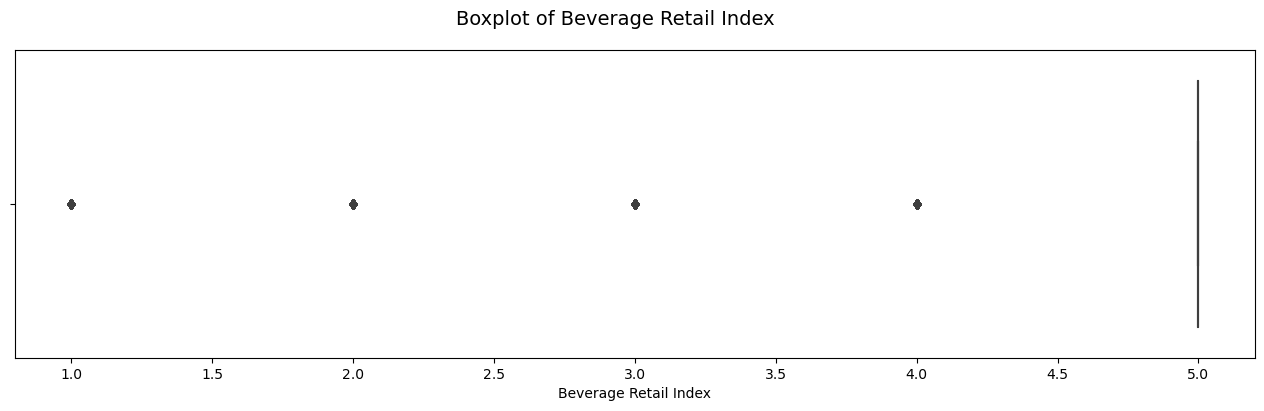

Descriptive Statistics: 

count    28054.000000
mean         4.441613
std          1.268247
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Beverage Retail Index, dtype: float64

Counts: 

1.0     2485
2.0     1012
3.0     1156
4.0      377
5.0    23024
Name: Beverage Retail Index, dtype: int64
---------------------------------------------------------



In [12]:
#establishing a distribution for the numerical valuables to highlight trends

variables = ['Store Selling Area (M2)', 'Beverage Retail Index']

# Defining a function to plot variables
def boxplot(data, x_variable):
    """
    Plot boxplots of count/integer variables
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(16,4)
    fig.suptitle("Boxplot of " + x_variable, fontsize=14)
    sns.boxplot(data=data, x=x_variable)
    plt.show()

    print("Descriptive Statistics: \n",
          data[x_variable].describe(),
          "\nCounts: \n",
          data[x_variable].value_counts(normalize = False).sort_index(),
          "---------------------------------------------------------\n",
          sep = '\n')

# Loop through each variable in data set and run the function pre-defined
for col in Alimosho.columns:
    if col in variables:
        boxplot(data = Alimosho, x_variable = col)

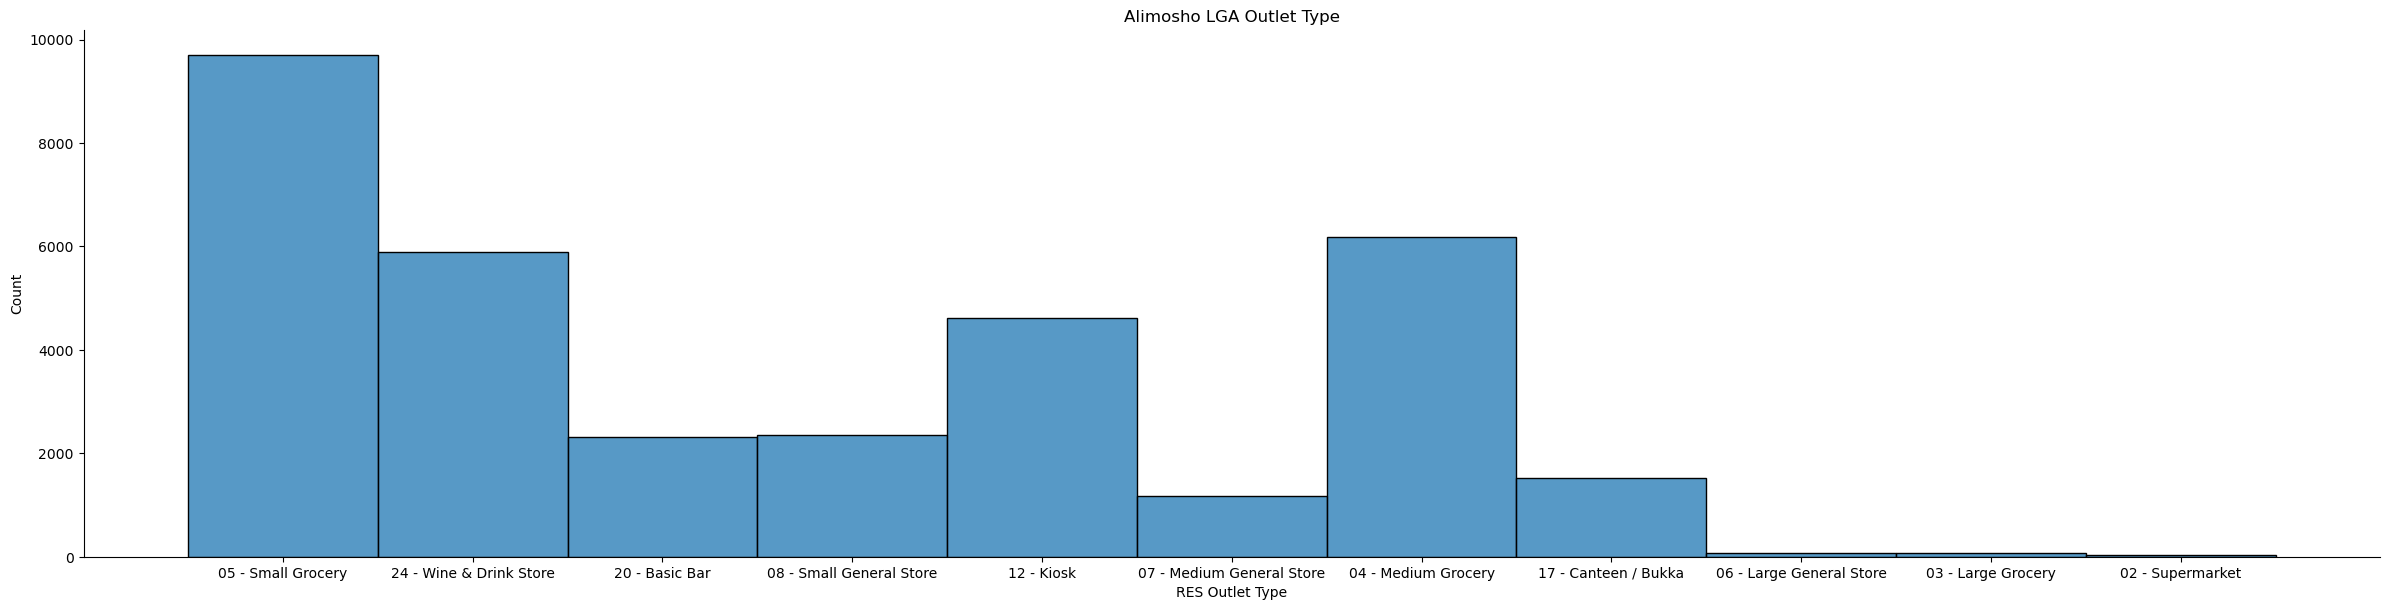

In [13]:

#plotting a distribution of the outlet types
sns.displot(data   = Alimosho,
            x      = 'RES Outlet Type',
            height = 6,
            aspect = 4)

# Label title & axis
plt.title(label   = 'Alimosho LGA Outlet Type')
plt.xlabel(xlabel = 'RES Outlet Type')
plt.ylabel(ylabel = 'Count')

# Display plot
plt.show()

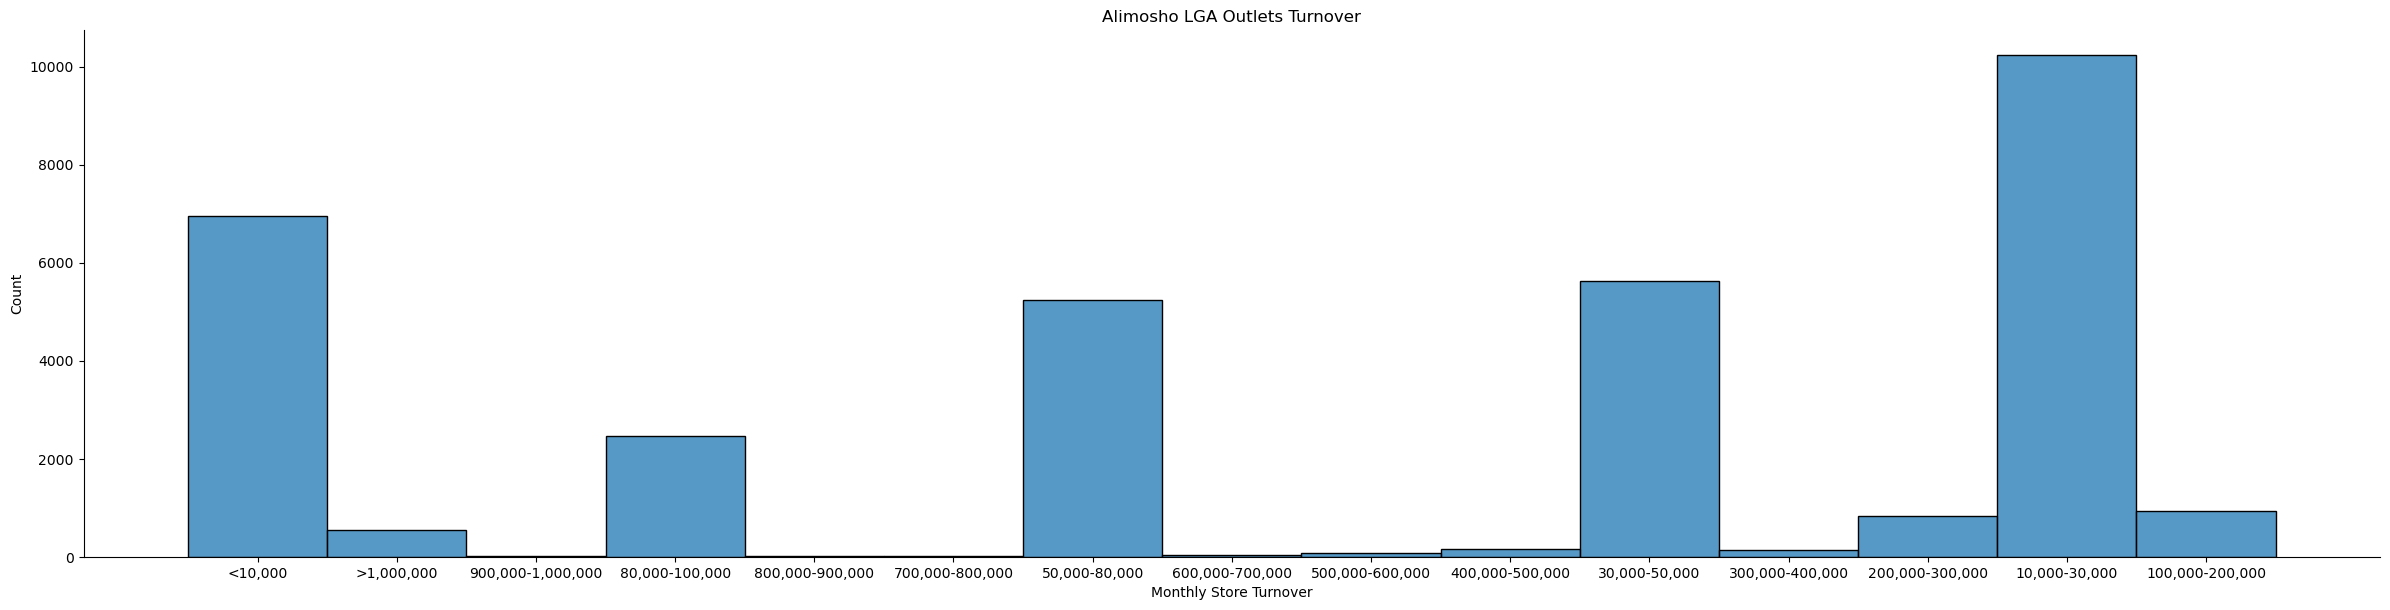

In [16]:
#plotting a distribution of the outlets turnover (using the range provided)
sns.displot(data   = Alimosho,
            x      = 'Monthly Store Turnover',
            height = 6,
            aspect = 4 )

# Label title & axis
plt.title(label   = 'Alimosho LGA Outlets Turnover')
plt.xlabel(xlabel = 'Monthly Store Turnover')
plt.ylabel(ylabel = 'Count')


# Display plot
plt.show()

In [17]:
#changing dtypes of the column

Alimosho['PH - Non Alcoholic Beverages'] = Alimosho['PH - Non Alcoholic Beverages'].astype('object')
Alimosho.dtypes

TDLinx                            object
Picture                             bool
LGA Name                          object
RES Outlet Type                   object
Latitude                         float64
Longitude                        float64
Neighbourhood Income Profile      object
Store Selling Area (M2)            int64
Monthly Store Turnover            object
PH - Non Alcoholic Beverages      object
Beverage Trade Profile            object
Beverage Retail Index            float64
Beverage Retail%                  object
Bin                             category
dtype: object

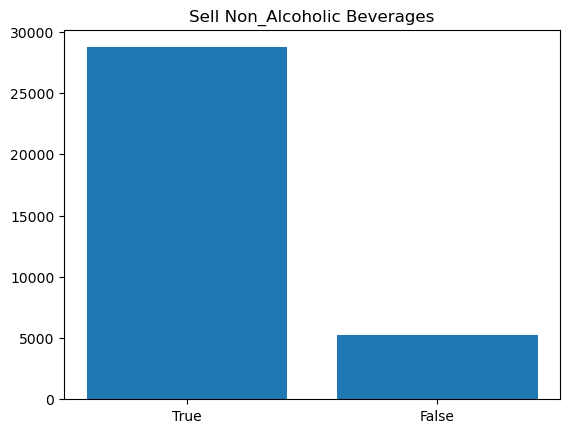

In [18]:
#determining the count of sellers vs non_sellers

# Data
data = Alimosho['PH - Non Alcoholic Beverages' ]

# Count the number of True and False values
true_count = sum(data)
false_count = len(data) - true_count

# Create labels for the chart
labels = ['True', 'False']

# Create values for the chart
values = [true_count, false_count]

# Create a bar chart
plt.bar(labels, values)

# Add a title to the chart
plt.title('Sell Non_Alcoholic Beverages')

# Display the chart
plt.show()


In [19]:
#cleaning the columns
#columns dropping
Ali = Alimosho.drop(Alimosho.loc[:, ['Picture', 'LGA Name','Beverage Retail%']].columns, 
                         axis=1)

#columns rename
AliLGA = Ali.rename(columns={"PH - Non Alcoholic Beverages": "_sellLRB"})

# Filter the DataFrame to include only rows with True values in "PH - Non Alcoholic Beverages" column
Alimosho_filtered = AliLGA[AliLGA["_sellLRB"] == True]

# declare head of filtered data
Alimosho_filtered.head()


,TDLinx,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Bin
0,L3005043,05 - Small Grocery,6.648058,3.252250,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]"
1,L3005044,24 - Wine & Drink Store,6.647841,3.252777,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]"
2,L3005045,20 - Basic Bar,6.647844,3.252944,Medium Class C,10,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]"
4,L3005048,20 - Basic Bar,6.647641,3.253381,Medium Class C,12,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]"
5,L3005049,20 - Basic Bar,6.648117,3.253556,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]"


In [20]:
#convert the filtered data to CSV
Alimosho_filtered.to_csv("filtered_data.csv", index=False)

## Encoding

### Monthly Store Turnover

In [43]:


# Define the custom order for encoding
custom_order = ['<10,000', '10,000-30,000', '30,000-50,000','50,000-80,000','80,000-100,000',
          '100,000-200,000', '200,000-300,000','300,000-400,000','400,000-500,000', '500,000-600,000',
          '600,000-700,000', '700,000-800,000','800,000-900,000', '900,000-1,000,000', '>1,000,000']

# Create a mapping dictionary with the custom order
mapping_dict = {category: i for i, category in enumerate(custom_order)}

# Create a new column with the encoded values
Alimosho_filtered['MST Encoded'] = Alimosho_filtered['Monthly Store Turnover'].map(mapping_dict)

# Print the encoded column
print(Alimosho_filtered['MST Encoded'])


0        0
1        0
2        0
4        0
5        0
        ..
33940    1
33941    1
33942    1
33943    1
33944    1
Name: Monthly Store Turnover Encoded, Length: 27482, dtype: int64


/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_80410/3037732007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alimosho_filtered['Monthly Store Turnover Encoded'] = Alimosho_filtered['Monthly Store Turnover'].map(mapping_dict)


We'll leave this part out for now due to "Blackbox". dont know how to encode it ordinally

In [22]:
# ##installing category_encoders
# #pip install category_encoders

# import category_encoders as ce

# # Create an instance of OrdinalEncoder
# ordinal_encoder = ce.OrdinalEncoder()

# # Fit the encoder to your categorical variable
# ordinal_encoder.fit(Alimosho_filtered['Monthly Store Turnover'])

# # Encode the categorical variable
# encoded_variable = ordinal_encoder.transform(Alimosho_filtered['Monthly Store Turnover'])

# Alimosho_filtered['MST Encoded'] = encoded_variable

# Alimosho_filtered.head()


/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_80410/1804012598.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alimosho_filtered['MST Encoded'] = encoded_variable


,TDLinx,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Bin,Monthly Store Turnover Encoded,MST Encoded
0,L3005043,05 - Small Grocery,6.648058,3.252250,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1
1,L3005044,24 - Wine & Drink Store,6.647841,3.252777,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1
2,L3005045,20 - Basic Bar,6.647844,3.252944,Medium Class C,10,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]",0.0,1
4,L3005048,20 - Basic Bar,6.647641,3.253381,Medium Class C,12,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]",0.0,1
5,L3005049,20 - Basic Bar,6.648117,3.253556,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1


In [23]:
Alimosho_filtered['Monthly Store Turnover'].value_counts()

10,000-30,000        8714
<10,000              5649
30,000-50,000        4704
50,000-80,000        4308
80,000-100,000       2183
100,000-200,000       822
200,000-300,000       796
>1,000,000            537
400,000-500,000       153
300,000-400,000       130
500,000-600,000        73
600,000-700,000        37
900,000-1,000,000      17
800,000-900,000        14
700,000-800,000        14
Name: Monthly Store Turnover, dtype: int64

In [24]:
Alimosho_filtered['MST Encoded'].value_counts()

15    8714
1     5649
12    4704
8     4308
5     2183
16     822
14     796
2      580
3      537
11     153
13     130
10      73
9       37
4       17
6       14
7       14
Name: MST Encoded, dtype: int64

### Neighbourhood Income Profile

In [51]:
Alimosho_filtered['Neighbourhood Income Profile'].unique()

array(['Medium Class  C', 'Low Class  D/E', 'High Class  A/B'],
      dtype=object)

In [55]:
# Define the custom order for encoding
custom_order = [ 'Low Class  D/E', 'Medium Class  C', 'High Class  A/B']

# Create a mapping dictionary with the custom order
mapping_dict = {category: i for i, category in enumerate(custom_order)}

# Create a new column with the encoded values
Alimosho_filtered['Neighbourhood Encoded'] = Alimosho_filtered['Neighbourhood Income Profile'].map(mapping_dict)

# Print the encoded column
print(Alimosho_filtered[['Neighbourhood Encoded','Neighbourhood Income Profile']].head(15))


    Neighbourhood Encoded Neighbourhood Income Profile
0                       1              Medium Class  C
1                       1              Medium Class  C
2                       1              Medium Class  C
4                       1              Medium Class  C
5                       1              Medium Class  C
6                       1              Medium Class  C
7                       1              Medium Class  C
8                       1              Medium Class  C
9                       1              Medium Class  C
10                      1              Medium Class  C
11                      1              Medium Class  C
12                      1              Medium Class  C
13                      1              Medium Class  C
15                      1              Medium Class  C
16                      1              Medium Class  C


/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_80410/3321953037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alimosho_filtered['Neighbourhood Encoded'] = Alimosho_filtered['Neighbourhood Income Profile'].map(mapping_dict)


In [58]:
Alimosho_filtered['RES Outlet Type'].value_counts()

05 - Small Grocery           7831
24 - Wine & Drink Store      5334
04 - Medium Grocery          5123
12 - Kiosk                   3102
20 - Basic Bar               1967
08 - Small General Store     1795
17 - Canteen / Bukka         1317
07 - Medium General Store     902
03 - Large Grocery             50
06 - Large General Store       49
02 - Supermarket               12
Name: RES Outlet Type, dtype: int64

In [56]:
#declaring info of the filtered data
Alimosho_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 33944
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   TDLinx                          27482 non-null  object  
 1   RES Outlet Type                 27482 non-null  object  
 2   Latitude                        27482 non-null  float64 
 3   Longitude                       27482 non-null  float64 
 4   Neighbourhood Income Profile    27482 non-null  object  
 5   Store Selling Area (M2)         27482 non-null  int64   
 6   Monthly Store Turnover          27482 non-null  object  
 7   _sellLRB                        27482 non-null  bool    
 8   Beverage Trade Profile          27482 non-null  object  
 9   Beverage Retail Index           27482 non-null  float64 
 10  Bin                             27482 non-null  category
 11  Monthly Store Turnover Encoded  27482 non-null  int64   
 12  MST Encoded       

In [26]:
#dropping na of filtered data
Alimosho_filtered.dropna(inplace=True)

Alimosho_filtered.shape

/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_80410/902625771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alimosho_filtered.dropna(inplace=True)


(27482, 13)

In [27]:
#replacing the numbers in the data
Alimosho_filtered.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

Alimosho_filtered.shape

/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_80410/539361176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alimosho_filtered.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)


(27482, 13)

## Scaling & Elbow method

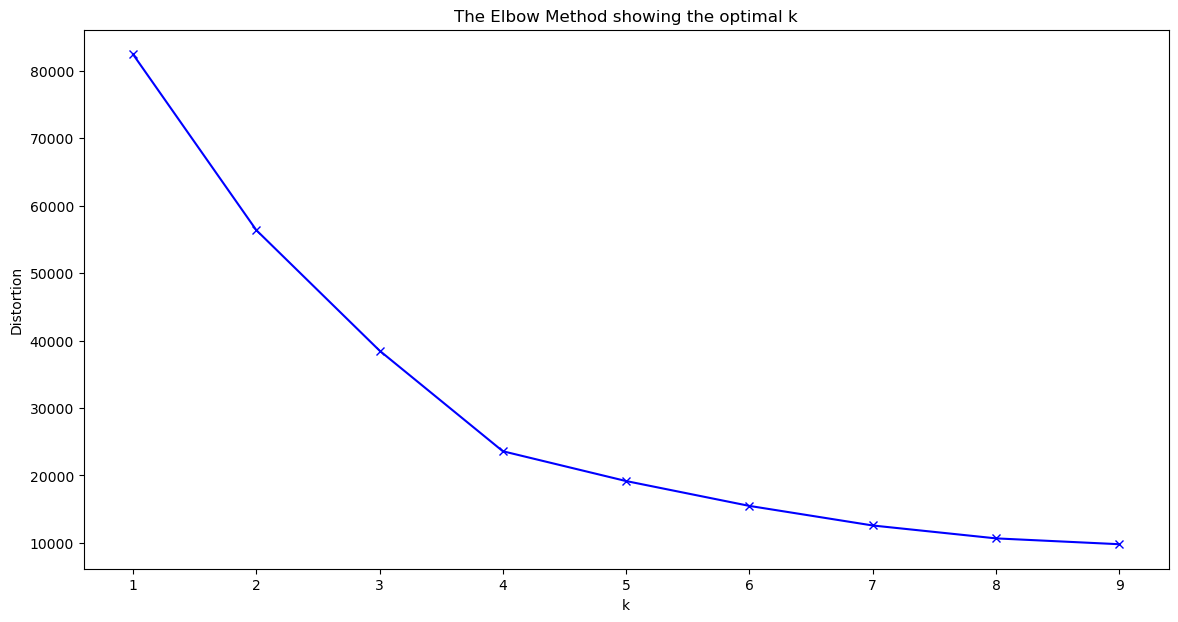

In [28]:
# Subset for explanatory variables for stores segmentation
X = Alimosho_filtered[['Store Selling Area (M2)',
                       'Beverage Retail Index',
                       'MST Encoded']]

# Instantiate scaler
scaler = StandardScaler()

# Fit the scaler with our data for stores segmentation
scaler.fit(X)

# Scale the data
X_scaled = scaler.transform(X)

##############################################################################
# Plot elbow point for optimal K

# Placeholder
distortions = []

# Number of Ks
K = range(1, 10)

# Loop through each K
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)                     # Fit with scaled data
    distortions.append(kmeanModel.inertia_)      # Append inertia to distortions

# Plot elbow point
plt.figure(figsize=(14, 7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## KMeans

/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_80410/1301632854.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alimosho_filtered["KMEANS_CLUSTERS"] = k_means_labels


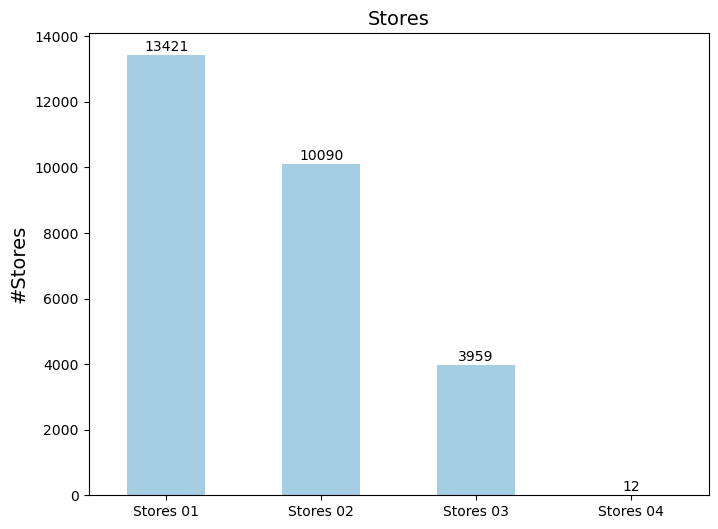

In [29]:
# Instantiate number of clusters
clusterNum = 4

# Instantiate KMEANS model
k_means = KMeans(init         = "k-means++", 
                 n_clusters   = clusterNum, 
                 n_init       = 12,
                 random_state = 219)

# Fit the model
k_means.fit(X_scaled)

# Grab each label (segmentation) for each stores
k_means_labels = k_means.labels_

# Add cluster labels to data set
Alimosho_filtered["KMEANS_CLUSTERS"] = k_means_labels


##############################################################################
# Plot 

# Count number of churn per month
clusters = Alimosho_filtered["KMEANS_CLUSTERS"].value_counts()

# Create plot
ax = clusters.plot(kind='bar', 
                  legend = True,
                  figsize = (8,6),
                  rot = 0,
                  colormap = "Paired")


# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Set plot aesthetics
ax.set_ylabel('#Stores',size = 14)
ax.set_xlabel('')
ax.set_title("Stores", size = 14)
ax.set_xticklabels(labels = ['Stores 01', "Stores 02", "Stores 03", "Stores 04"])
ax.legend().remove()
 
# Display plot
plt.show()
#plt.close()

In [30]:
#declaring to see the full data with the clustering 
Alimosho_filtered.head(10)

,TDLinx,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Bin,Monthly Store Turnover Encoded,MST Encoded,KMEANS_CLUSTERS
0,L3005043,05 - Small Grocery,6.648058,3.252250,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1,1
1,L3005044,24 - Wine & Drink Store,6.647841,3.252777,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1,1
2,L3005045,20 - Basic Bar,6.647844,3.252944,Medium Class C,10,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]",0.0,1,1
4,L3005048,20 - Basic Bar,6.647641,3.253381,Medium Class C,12,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]",0.0,1,1
5,L3005049,20 - Basic Bar,6.648117,3.253556,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1,1
6,L3005050,08 - Small General Store,6.649526,3.252664,Medium Class C,8,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1,1
7,L3005051,24 - Wine & Drink Store,6.642351,3.262029,Medium Class C,9,"<10,000",True,Retail Only,5.0,"(0.601, 80.8]",0.0,1,2
8,L3005063,24 - Wine & Drink Store,6.670375,3.265690,Medium Class C,9,"<10,000",True,Wholesale Only,1.0,"(0.601, 80.8]",0.0,1,1
9,L3005068,24 - Wine & Drink Store,6.670038,3.266032,Medium Class C,9,"<10,000",True,Both [Retail & Wholesale],2.0,"(0.601, 80.8]",0.0,1,1
10,L3005069,05 - Small Grocery,6.674329,3.253849,Medium Class C,10,"<10,000",True,Retail Only,5.0,"(0.601, 80.8]",0.0,1,2


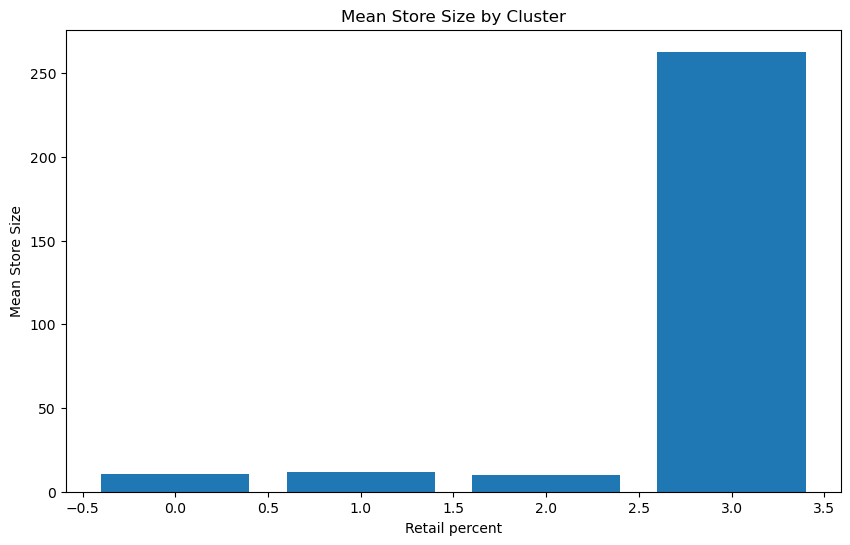

In [31]:
Retail_mean = Alimosho_filtered.groupby('KMEANS_CLUSTERS')['Store Selling Area (M2)'].mean()

plt.figure(figsize=(10, 6))

# Plotting the bar chart or box plot
plt.bar(Retail_mean.index, Retail_mean.values)
plt.xlabel('Retail percent')
plt.ylabel('Mean Store Size')
plt.title('Mean Store Size by Cluster')

#plt.xticks(rotation=45)

plt.show()

In [32]:
cluster_1 = Alimosho_filtered[Alimosho_filtered['KMEANS_CLUSTERS']==0]
cluster_1.head()

,TDLinx,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Bin,Monthly Store Turnover Encoded,MST Encoded,KMEANS_CLUSTERS
7773,L3025554,03 - Large Grocery,6.714785,3.216403,Medium Class C,50,"50,000-80,000",True,Both [Retail & Wholesale],5.0,"(0.601, 80.8]",3.0,8,0
7889,L3100727,03 - Large Grocery,6.608129,3.261815,Medium Class C,99,"50,000-80,000",True,Retail Only,5.0,"(80.8, 160.6]",3.0,8,0
7978,L3067959,20 - Basic Bar,6.592633,3.282446,Medium Class C,58,"50,000-80,000",True,Retail Only,5.0,"(0.601, 80.8]",3.0,8,0
8100,L3022166,03 - Large Grocery,6.716598,3.212931,Medium Class C,50,"50,000-80,000",True,Retail Only,5.0,"(0.601, 80.8]",3.0,8,0
8195,L3049360,06 - Large General Store,6.640195,3.284584,Medium Class C,50,"50,000-80,000",True,Retail Only,5.0,"(0.601, 80.8]",3.0,8,0


In [33]:
cluster_2 = Alimosho_filtered[Alimosho_filtered['KMEANS_CLUSTERS']==1]
cluster_2.head()

,TDLinx,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Bin,Monthly Store Turnover Encoded,MST Encoded,KMEANS_CLUSTERS
0,L3005043,05 - Small Grocery,6.648058,3.252250,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1,1
1,L3005044,24 - Wine & Drink Store,6.647841,3.252777,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1,1
2,L3005045,20 - Basic Bar,6.647844,3.252944,Medium Class C,10,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]",0.0,1,1
4,L3005048,20 - Basic Bar,6.647641,3.253381,Medium Class C,12,"<10,000",True,Retail Only,1.0,"(0.601, 80.8]",0.0,1,1
5,L3005049,20 - Basic Bar,6.648117,3.253556,Medium Class C,10,"<10,000",True,Both [Retail & Wholesale],1.0,"(0.601, 80.8]",0.0,1,1


In [34]:
cluster_3 = Alimosho_filtered[Alimosho_filtered['KMEANS_CLUSTERS']==2]
cluster_3.head()

,TDLinx,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Bin,Monthly Store Turnover Encoded,MST Encoded,KMEANS_CLUSTERS
7,L3005051,24 - Wine & Drink Store,6.642351,3.262029,Medium Class C,9,"<10,000",True,Retail Only,5.0,"(0.601, 80.8]",0.0,1,2
10,L3005069,05 - Small Grocery,6.674329,3.253849,Medium Class C,10,"<10,000",True,Retail Only,5.0,"(0.601, 80.8]",0.0,1,2
11,L3005075,08 - Small General Store,6.670462,3.266719,Medium Class C,6,"<10,000",True,Retail Only,5.0,"(0.601, 80.8]",0.0,1,2
12,L3005076,12 - Kiosk,6.674160,3.253139,Medium Class C,5,"<10,000",True,Retail Only,5.0,"(0.601, 80.8]",0.0,1,2
13,L3005087,12 - Kiosk,6.674036,3.253117,Medium Class C,6,"<10,000",True,Retail Only,5.0,"(0.601, 80.8]",0.0,1,2


In [35]:
cluster_4 = Alimosho_filtered[Alimosho_filtered['KMEANS_CLUSTERS']==3]
cluster_4.head()

,TDLinx,RES Outlet Type,Latitude,Longitude,Neighbourhood Income Profile,Store Selling Area (M2),Monthly Store Turnover,_sellLRB,Beverage Trade Profile,Beverage Retail Index,Bin,Monthly Store Turnover Encoded,MST Encoded,KMEANS_CLUSTERS
2005,L3044708,02 - Supermarket,6.661340,3.280120,Medium Class C,221,"<10,000",True,Both [Retail & Wholesale],4.0,"(160.6, 240.4]",0.0,1,3
5074,L3045029,02 - Supermarket,6.553651,3.245239,Medium Class C,253,"900,000-1,000,000",True,Retail Only,5.0,"(240.4, 320.2]",13.0,4,3
5938,L3003763,02 - Supermarket,6.599385,3.279660,Medium Class C,260,"80,000-100,000",True,Retail Only,5.0,"(240.4, 320.2]",4.0,5,3
18354,L3128506,02 - Supermarket,6.576754,3.268659,Medium Class C,251,">1,000,000",True,Retail Only,5.0,"(240.4, 320.2]",14.0,3,3
18372,L3027452,02 - Supermarket,6.608693,3.258328,Medium Class C,203,"300,000-400,000",True,Retail Only,5.0,"(160.6, 240.4]",7.0,13,3


In [36]:
print(Alimosho_filtered.groupby(['Neighbourhood Income Profile','KMEANS_CLUSTERS']).size().unstack(fill_value=0))

KMEANS_CLUSTERS                  0     1     2   3
Neighbourhood Income Profile                      
High Class  A/B                 22    34   192   0
Low Class  D/E                3517   756   996   0
Medium Class  C               9882  3169  8902  12


In [37]:
print(Alimosho_filtered.groupby(['RES Outlet Type','KMEANS_CLUSTERS']).size().unstack(fill_value=0))

KMEANS_CLUSTERS               0     1     2   3
RES Outlet Type                                
02 - Supermarket              0     0     0  12
03 - Large Grocery           24    13    13   0
04 - Medium Grocery        2668   420  2035   0
05 - Small Grocery         3646   853  3332   0
06 - Large General Store     24    19     6   0
07 - Medium General Store   509   135   258   0
08 - Small General Store    899   439   457   0
12 - Kiosk                 1687   133  1282   0
17 - Canteen / Bukka        664    70   583   0
20 - Basic Bar             1207   142   618   0
24 - Wine & Drink Store    2093  1735  1506   0


In [38]:
print(Alimosho_filtered.groupby(['Monthly Store Turnover','KMEANS_CLUSTERS']).size().unstack(fill_value=0))

KMEANS_CLUSTERS            0     1     2  3
Monthly Store Turnover                     
10,000-30,000           8055   453     0  0
100,000-200,000          555   254     0  2
200,000-300,000          684   110     0  0
30,000-50,000           3808   659     0  0
300,000-400,000          112    12     0  2
400,000-500,000          131    20     0  0
50,000-80,000             10   599  3572  0
500,000-600,000           65     8     0  0
600,000-700,000            1     7    29  0
700,000-800,000            0     3    11  0
80,000-100,000             0   368  1783  1
800,000-900,000            0     3    11  0
900,000-1,000,000          0     7     9  1
<10,000                    0  1338  4264  1
>1,000,000                 0   118   411  5
